In [1]:
from zget_data import get_responses, get_qdetails, get_questions
from collections import defaultdict
import pandas as pd
import json

In [2]:
page_map = {
    '0': 'startstudy',
    '1': 'fpass',
    '2': 'fcog',
    '3': 'fpasssurvey',
    '4': 'fpassrecall',
    '5': 'pagegif',
    '6': 'desinint',
    '7': 'quest',
    '8': 'csquest',
    '9': 'motivation',
    '10': 'spass',
    '11': 'scog',
    '12': 'spasssurvey',
    '13': 'spassrecall',
    '14': 'demo',
    '15': 'thanks',
}

In [3]:
quest_map = {
    'Perspicuity': ["understandable", "easy to learn", "easy", "clear"],
    'Aesthetics': ["beautiful", "stylish", "appealing", "pleasant"],
    'Usefulness': ["useful", "helpful", "beneficial", "rewarding"],
    'Clarity': ["well grouped", "structured", "ordered", "organized"]
}

In [4]:
password_response, time_response, survey_response, dids = get_responses()

In [5]:
password_response_df = pd.DataFrame(password_response)
password_response_df.sort_index(axis=1)

,password2,password2_recall1,password2_recall2,password2_recall3
0,Prolific1!,NaN,NaN,NaN
1,pSVNLb85CUNPCwX,NaN,NaN,NaN
2,CozyBi11$,NaN,NaN,NaN
3,PRO333TECT,NaN,NaN,NaN
4,amandanike@91s,NaN,NaN,NaN
...,...,...,...,...
126,m0gRBn$^$V95806MS*jl,NaN,NaN,NaN
127,Ws14827!Ld,NaN,NaN,NaN
128,DCs#Bnk7,DCsBnk7,DCs#BNk7,NaN
129,4518184@@,NaN,NaN,NaN


In [6]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
page_time_df

,fcog,fpassrecall,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,6.993,12.491,4.413,9.111,40.826,237.705,32.419,15.948,26.032,15.129,49.566,89.285,8.998633
1,5.839,13.774,12.693,19.878,67.504,134.684,15.391,25.888,13.926,19.650,9.519,48.709,6.457583
2,5.174,11.211,6.987,15.680,36.149,110.712,12.244,35.100,16.638,24.316,8.088,28.816,5.185250
3,1.664,22.872,3.551,5.522,43.416,115.263,2.750,48.463,7.047,17.072,15.119,96.297,6.317267
4,5.599,32.481,11.720,71.919,137.019,206.751,27.432,90.620,21.551,33.020,33.760,57.601,12.157883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,10.974,12.813,6.607,20.575,37.760,153.590,19.337,30.086,9.032,19.466,7.269,30.913,5.973700
127,9.237,27.703,7.435,29.832,65.615,189.192,36.536,75.067,13.396,31.367,27.890,45.550,9.313667
128,13.409,19.102,38.229,68.628,95.781,210.613,20.121,48.992,14.261,36.459,99.563,27.472,11.543833
129,6.618,15.085,8.383,41.453,52.419,149.316,12.804,17.694,14.235,24.838,8.208,32.223,6.387933


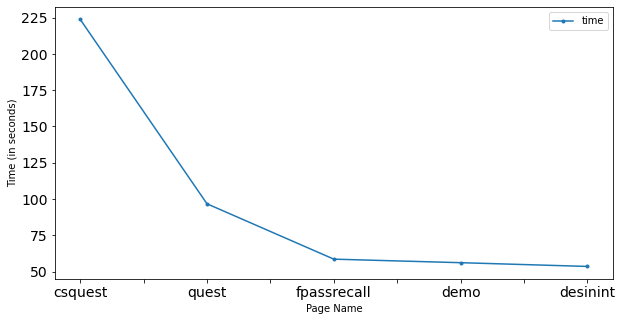

In [7]:
# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.mean().sort_values(ascending=False).head(5).items():
    top5 = top5.append(pd.DataFrame([[i, data]], columns=top5.columns), ignore_index=True)

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in seconds)", fontsize=14, style=".-")

In [8]:
survey_response_df = pd.DataFrame(survey_response)
survey_response_df

,8,12,3,7,14
0,"{'5-1': '5', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-1': '6', '2-1': '5', '3-1': '1', '3-2': '2...","{'1-1': '7', '1-2': '2', '1-3': '1', '1-4': '1'}","{'1-17': '1', '1-16': '7', '1-12': '3', '1-13'...","{'1-1': 'Man', '2-1': '25-29 years old', '3-1'..."
1,"{'5-1': '1', '6-1': '1', '7-1': '5', '8-1': ['...","{'1-1': '7', '2-1': '1', '3-1': '7', '3-2': '1...","{'1-1': '6', '1-2': '7', '1-3': '7', '1-4': '1'}","{'1-16': '2', '1-11': '5', '1-12': '3', '1-17'...","{'1-1': 'Man', '2-1': '35-39 years old', '3-1'..."
2,"{'5-1': '5', '6-1': '1', '7-1': '5', '8-1': ['...","{'1-1': '6', '2-1': '6', '3-1': '2', '3-2': '3...","{'1-1': '7', '1-2': '1', '1-3': '3', '1-4': '5'}","{'1-11': '7', '1-15': '6', '1-16': '1', '1-13'...","{'1-1': 'Man', '2-1': '18-24 years old', '3-1'..."
3,"{'5-1': '6', '6-1': '1', '7-1': '4', '8-1': ['...","{'1-1': '6', '2-1': '7', '3-1': '6', '3-2': '1...","{'1-1': '4', '1-2': '6', '1-3': '5', '1-4': '1'}","{'1-15': '6', '1-13': '1', '1-14': '6', '1-16'...","{'1-1': 'Woman', '2-1': '30-34 years old', '3-..."
4,"{'6-1': '1', '8-1': ['Social Media', 'Financia...","{'1-1': '7', '2-1': '7', '3-1': '6', '3-2': '1...","{'1-1': '5', '1-2': '7', '1-3': '6', '1-4': '1'}","{'1-15': '7', '1-16': '1', '1-14': '7', '1-13'...","{'1-1': 'Man', '2-1': '35-39 years old', '3-1'..."
...,...,...,...,...,...
126,"{'6-1': '1', '8-1': ['Financial Websites', 'E-...","{'1-1': '7', '2-1': '4', '3-1': '7', '3-2': '1...","{'1-1': '2', '1-2': '7', '1-3': '7', '1-4': '1'}","{'1-16': '2', '1-17': '6', '1-14': '6', '1-13'...","{'1-1': 'Man', '2-1': '35-39 years old', '3-1'..."
127,"{'5-1': '6', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-1': '6', '2-1': '7', '3-1': '7', '3-2': '1...","{'1-1': '5', '1-2': '6', '1-3': '6', '1-4': '1'}","{'1-13': '3', '1-11': '6', '1-16': '3', '1-17'...","{'1-1': 'Woman', '2-1': '50-54 years old', '3-..."
128,"{'1-5': '5', '1-6': '5', '1-1': '6', '1-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '5', '3-2': '2...","{'1-1': '4', '1-2': '6', '1-3': '6', '1-4': '2'}","{'1-3': '4', '1-4': '3', '1-2': '3', '1-8': '5...","{'1-1': 'Woman', '2-1': '55-59 years old', '3-..."
129,"{'1-2': '6', '1-4': '5', '1-1': '6', '1-5': '6...","{'1-1': '5', '2-1': '6', '3-1': '3', '3-2': '3...","{'1-1': '6', '1-2': '5', '1-3': '6', '1-4': '2'}","{'1-10': '2', '1-2': '2', '1-9': '5', '1-6': '...","{'1-1': 'Man', '2-1': '25-29 years old', '3-1'..."


In [9]:
survey_response_df['did'] = dids
survey_response_df.groupby(by='did').count()

,8,12,3,7,14
did,,,,,
1,27,27,27,27,27
2,26,26,26,26,26
3,26,26,26,26,26
4,26,26,26,26,26
5,26,26,26,26,26


### Attention Check

In [10]:
attention = {
   '7': {
      '1-6' : 7
   },
   '8': {
      '2-1' : 6,
      '6-1' : 1
   },
   '12': {
      '4-1': 2
   }
}

In [11]:
for pid, sub in attention.items():
    for qsid, val in sub.items():
        print(get_qdetails(pid, qsid))


{'sid': 6, 'type': 'likert', 'title': '', 'elements': {'low': 'select rightmost circle', 'high': 'select rightmost circle'}}
Please select the sixth option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': 'sixth option', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}
Please select the first option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': 'first option', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}
Please select the second option which tells us you are paying attention: 
{'sid': 1, 'type': 'likert', 'title': 'second option', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}


In [12]:
attentive_participants = defaultdict(lambda: True)
for pid, sub in attention.items():
    # print(pid)
    for qsid, e in sub.items():
        # print(qsid)
        for pn, a in enumerate(survey_response_df[pid].apply(lambda x: x.get(qsid))):
            # print(pn, e, a, str(e)==str(a))
            attentive_participants[str(pn)] = attentive_participants[str(pn)] and (str(e)==str(a))

In [13]:
attentive = pd.DataFrame(attentive_participants, index=[0]).transpose()
attentive.columns = ['attentive']
attentive.value_counts()

attentive
True         131
dtype: int64

In [14]:
survey_response_df['attention'] = attentive['attentive'].values
survey_response_df = survey_response_df.loc[survey_response_df['attention'] == True]
survey_response_df

,8,12,3,7,14,did,attention
0,"{'5-1': '5', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-1': '6', '2-1': '5', '3-1': '1', '3-2': '2...","{'1-1': '7', '1-2': '2', '1-3': '1', '1-4': '1'}","{'1-17': '1', '1-16': '7', '1-12': '3', '1-13'...","{'1-1': 'Man', '2-1': '25-29 years old', '3-1'...",2,True
1,"{'5-1': '1', '6-1': '1', '7-1': '5', '8-1': ['...","{'1-1': '7', '2-1': '1', '3-1': '7', '3-2': '1...","{'1-1': '6', '1-2': '7', '1-3': '7', '1-4': '1'}","{'1-16': '2', '1-11': '5', '1-12': '3', '1-17'...","{'1-1': 'Man', '2-1': '35-39 years old', '3-1'...",3,True
2,"{'5-1': '5', '6-1': '1', '7-1': '5', '8-1': ['...","{'1-1': '6', '2-1': '6', '3-1': '2', '3-2': '3...","{'1-1': '7', '1-2': '1', '1-3': '3', '1-4': '5'}","{'1-11': '7', '1-15': '6', '1-16': '1', '1-13'...","{'1-1': 'Man', '2-1': '18-24 years old', '3-1'...",5,True
3,"{'5-1': '6', '6-1': '1', '7-1': '4', '8-1': ['...","{'1-1': '6', '2-1': '7', '3-1': '6', '3-2': '1...","{'1-1': '4', '1-2': '6', '1-3': '5', '1-4': '1'}","{'1-15': '6', '1-13': '1', '1-14': '6', '1-16'...","{'1-1': 'Woman', '2-1': '30-34 years old', '3-...",5,True
4,"{'6-1': '1', '8-1': ['Social Media', 'Financia...","{'1-1': '7', '2-1': '7', '3-1': '6', '3-2': '1...","{'1-1': '5', '1-2': '7', '1-3': '6', '1-4': '1'}","{'1-15': '7', '1-16': '1', '1-14': '7', '1-13'...","{'1-1': 'Man', '2-1': '35-39 years old', '3-1'...",1,True
...,...,...,...,...,...,...,...
126,"{'6-1': '1', '8-1': ['Financial Websites', 'E-...","{'1-1': '7', '2-1': '4', '3-1': '7', '3-2': '1...","{'1-1': '2', '1-2': '7', '1-3': '7', '1-4': '1'}","{'1-16': '2', '1-17': '6', '1-14': '6', '1-13'...","{'1-1': 'Man', '2-1': '35-39 years old', '3-1'...",1,True
127,"{'5-1': '6', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-1': '6', '2-1': '7', '3-1': '7', '3-2': '1...","{'1-1': '5', '1-2': '6', '1-3': '6', '1-4': '1'}","{'1-13': '3', '1-11': '6', '1-16': '3', '1-17'...","{'1-1': 'Woman', '2-1': '50-54 years old', '3-...",5,True
128,"{'1-5': '5', '1-6': '5', '1-1': '6', '1-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '5', '3-2': '2...","{'1-1': '4', '1-2': '6', '1-3': '6', '1-4': '2'}","{'1-3': '4', '1-4': '3', '1-2': '3', '1-8': '5...","{'1-1': 'Woman', '2-1': '55-59 years old', '3-...",4,True
129,"{'1-2': '6', '1-4': '5', '1-1': '6', '1-5': '6...","{'1-1': '5', '2-1': '6', '3-1': '3', '3-2': '3...","{'1-1': '6', '1-2': '5', '1-3': '6', '1-4': '2'}","{'1-10': '2', '1-2': '2', '1-9': '5', '1-6': '...","{'1-1': 'Man', '2-1': '25-29 years old', '3-1'...",1,True


In [15]:
survey_response_df.groupby(by='did').count()

,8,12,3,7,14,attention
did,,,,,,
1,27,27,27,27,27,27
2,26,26,26,26,26,26
3,26,26,26,26,26,26
4,26,26,26,26,26,26
5,26,26,26,26,26,26


In [16]:
questions = get_questions()

### First Password Survey Analysis

In [17]:
# fpass survey analysis
fpasssurveyQ_df = pd.DataFrame(questions.get('3'))
fpasssurveyQ_df

,qid,text,subquestions
0,1,Please answer the following questions based on...,"[{'sid': 1, 'type': 'likert', 'title': 'I do n..."


In [18]:
# fpasssurvey
pd.DataFrame(survey_response_df['3'].to_dict())

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
1-1,7,6,7,4,5,5,4,7,3,5,...,7,5,2,6,4,2,5,4,6,7
1-2,2,7,1,6,7,7,5,7,7,7,...,5,4,7,6,5,7,6,6,5,6
1-3,1,7,3,5,6,6,4,7,5,7,...,6,5,6,7,6,7,6,6,6,7
1-4,1,1,5,1,1,6,7,1,1,3,...,2,3,2,2,3,1,1,2,2,6


In [19]:
# fpasssurvey
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,median
"I do not change my passwords, unless I have to.",7,6,7,4,5,5,4,7,3,5,...,5,2,6,4,2,5,4,6,7,5.0
I use different passwords for different online accounts that I have.,2,7,1,6,7,7,5,7,7,7,...,4,7,6,5,7,6,6,5,6,6.0
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",1,7,3,5,6,6,4,7,5,7,...,5,6,7,6,7,6,6,6,7,5.0
I do not include special characters in my password if it’s not required.,1,1,5,1,1,6,7,1,1,3,...,3,2,2,3,1,1,2,2,6,3.0


In [20]:
get_qdetails('7', '1-1')

"\n{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'not understandable', 'high': 'understandable'}}"

### Quest Analysis

In [21]:
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest['mean'] = quest.mean(axis=1)
quest

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,mean
1-17,1,6,7,7,7,7,7,7,7,7,...,5,6,5,4,6,5,5,6,6,5.740458
1-16,7,2,1,1,1,7,1,1,1,1,...,4,2,3,3,2,3,3,2,1,2.541985
1-12,3,3,2,2,1,5,1,6,1,1,...,2,2,2,2,1,1,3,3,1,2.519084
1-13,5,6,3,1,1,4,1,6,4,2,...,2,2,4,5,4,3,4,3,2,3.198473
1-14,1,6,7,6,7,5,7,7,7,7,...,5,6,5,6,6,5,5,6,7,5.580153
1-15,1,6,6,6,7,6,7,7,7,7,...,6,6,6,5,7,5,5,5,6,5.778626
1-11,4,5,7,7,7,7,7,2,7,7,...,6,6,6,5,6,6,4,6,6,5.625954
1-4,6,2,1,5,1,6,1,1,1,1,...,2,2,1,2,1,2,3,1,2,2.496183
1-10,3,3,2,2,1,6,1,6,1,1,...,2,2,2,1,2,1,5,2,1,2.679389
1-8,1,1,5,6,6,5,7,2,6,6,...,6,6,5,6,4,6,5,5,7,5.282443


In [22]:
# quest
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,mean
organized,1.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,5.0,6.0,5.0,4.0,6.0,5.0,5.0,6.0,6.0,5.740458
ordered,1.0,6.0,7.0,7.0,7.0,1.0,7.0,7.0,7.0,7.0,...,4.0,6.0,5.0,5.0,6.0,5.0,5.0,6.0,7.0,5.458015
beneficial,5.0,5.0,6.0,6.0,7.0,3.0,7.0,2.0,7.0,7.0,...,6.0,6.0,6.0,6.0,7.0,7.0,5.0,5.0,7.0,5.480916
rewarding,3.0,2.0,5.0,7.0,7.0,4.0,7.0,2.0,4.0,6.0,...,6.0,6.0,4.0,3.0,4.0,5.0,4.0,5.0,6.0,4.801527
well grouped,1.0,6.0,7.0,6.0,7.0,5.0,7.0,7.0,7.0,7.0,...,5.0,6.0,5.0,6.0,6.0,5.0,5.0,6.0,7.0,5.580153
structured,1.0,6.0,6.0,6.0,7.0,6.0,7.0,7.0,7.0,7.0,...,6.0,6.0,6.0,5.0,7.0,5.0,5.0,5.0,6.0,5.778626
helpful,4.0,5.0,7.0,7.0,7.0,7.0,7.0,2.0,7.0,7.0,...,6.0,6.0,6.0,5.0,6.0,6.0,4.0,6.0,6.0,5.625954
clear,2.0,6.0,7.0,3.0,7.0,2.0,7.0,7.0,7.0,7.0,...,6.0,6.0,7.0,6.0,7.0,6.0,5.0,7.0,6.0,5.503817
useful,5.0,5.0,6.0,6.0,7.0,2.0,7.0,2.0,7.0,7.0,...,6.0,6.0,6.0,7.0,6.0,7.0,3.0,6.0,7.0,5.320611
appealing,1.0,1.0,5.0,6.0,6.0,5.0,7.0,2.0,6.0,6.0,...,6.0,6.0,5.0,6.0,4.0,6.0,5.0,5.0,7.0,5.282443


In [23]:
pd.DataFrame(survey_response_df['8'].to_dict())

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
5-1,5,1,5,6,NaN,5,7,1,7,7,...,6,NaN,7,NaN,7,NaN,6,5,NaN,NaN
6-1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7-1,6,5,5,4,NaN,6,7,5,7,4,...,5,NaN,6,NaN,6,NaN,6,5,NaN,NaN
8-1,"[Social Media, Financial Websites, Course Mana...",[None of the above],"[Social Media, Email, Financial Websites, Cour...","[Social Media, Email]","[Social Media, Financial Websites, E-commerce ...","[Social Media, Email]","[Social Media, Email, E-commerce Websites, Cou...",[None of the above],"[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Financial Websites, E-co...",...,"[Social Media, Email]","[Social Media, Gaming Websites, E-commerce Web...","[Social Media, Email, Financial Websites, Gami...","[Social Media, Financial Websites, Gaming Webs...","[Social Media, Email, Financial Websites, E-co...","[Financial Websites, E-commerce Websites, Gove...","[Email, Financial Websites, E-commerce Website...","[Social Media, Email, Financial Websites, Gove...","[Social Media, Financial Websites, E-commerce ...","[Social Media, Financial Websites, E-commerce ..."
2-1,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
3-1,3,1,6,5,1,5,6,2,5,7,...,2,4,5,2,5,1,1,4,4,2
3-2,3,4,6,7,6,4,6,4,7,7,...,6,5,7,7,7,4,1,6,5,6
3-3,1,1,3,5,5,6,5,1,1,7,...,7,2,5,5,6,1,2,4,5,5
3-4,1,1,2,6,7,5,6,1,5,7,...,6,5,5,5,7,1,1,4,6,7
4-1,2,7,7,5,6,6,7,7,7,7,...,6,4,7,7,6,6,1,5,5,6


In [24]:
# csquest
qualindex = ['8-1', '10-1', '11-1']

# qualindex = ['8-1', '10-1']

csquest = pd.DataFrame(survey_response_df['8'].to_dict())
csquestqual = csquest.loc[qualindex]
display(csquestqual)

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
8-1,"[Social Media, Financial Websites, Course Mana...",[None of the above],"[Social Media, Email, Financial Websites, Cour...","[Social Media, Email]","[Social Media, Financial Websites, E-commerce ...","[Social Media, Email]","[Social Media, Email, E-commerce Websites, Cou...",[None of the above],"[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Financial Websites, E-co...",...,"[Social Media, Email]","[Social Media, Gaming Websites, E-commerce Web...","[Social Media, Email, Financial Websites, Gami...","[Social Media, Financial Websites, Gaming Webs...","[Social Media, Email, Financial Websites, E-co...","[Financial Websites, E-commerce Websites, Gove...","[Email, Financial Websites, E-commerce Website...","[Social Media, Email, Financial Websites, Gove...","[Social Media, Financial Websites, E-commerce ...","[Social Media, Financial Websites, E-commerce ..."
10-1,Thinking about my info being hacked into,"I guess the last panel, which shows how easy i...",The possibility of it showing a threat by only...,THE LAST PART IS REALLT MOTIVATES TO MAKE A ST...,81% of data breaches in 2020 happened due to w...,ALB*1988,Clean style with a very straight to the point ...,"Mainly the child asking the dad what he did, s...",The part where it takes over the account and s...,The hacker can't hack that system while creati...,...,the hacker makes me want to make a really stro...,I realize that password will be see it was ama...,The part where the hacker sends out the virus ...,Knowing how many people have their data compro...,THE PASSWORDS CAN BE EASILY ACCESSBLE ONE TO A...,The statistics stating the actual numbers of p...,The hacker's screen saying attack successful a...,The second part motives me most to create a st...,where it show that 4 out of 10 people use weak...,I am thinking of installing a hard password fo...
11-1,That if I have an insecure password my identit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The dartboard represents the difficulty level ...,...,the stronger your password is the more inner t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
normqsid = []

csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,mean,median
portrayal of hacker stimulates,5.0,1.0,5.0,6.0,0.0,5.0,7.0,1.0,7.0,7.0,...,7.0,0.0,7.0,0.0,6.0,5.0,0.0,0.0,4.198473,5.000000
portrayal of victim encourages,6.0,5.0,5.0,4.0,0.0,6.0,7.0,5.0,7.0,4.0,...,6.0,0.0,6.0,0.0,6.0,5.0,0.0,0.0,4.190840,5.000000
Makes me worried,3.0,1.0,6.0,5.0,1.0,5.0,6.0,2.0,5.0,7.0,...,5.0,2.0,5.0,1.0,1.0,4.0,4.0,2.0,4.427481,5.000000
Encourages me to create a strong password,3.0,4.0,6.0,7.0,6.0,4.0,6.0,4.0,7.0,7.0,...,7.0,7.0,7.0,4.0,1.0,6.0,5.0,6.0,5.610687,6.000000
Makes me feel emotionally connected to the presented scenario,1.0,1.0,3.0,5.0,5.0,6.0,5.0,1.0,1.0,7.0,...,5.0,5.0,6.0,1.0,2.0,4.0,5.0,5.0,4.694656,5.000000
Makes me feel personally connected to the presented scenario,1.0,1.0,2.0,6.0,7.0,5.0,6.0,1.0,5.0,7.0,...,5.0,5.0,7.0,1.0,1.0,4.0,6.0,7.0,4.732824,5.000000
easy to follow,2.0,7.0,7.0,5.0,6.0,6.0,7.0,7.0,7.0,7.0,...,7.0,7.0,6.0,6.0,1.0,5.0,5.0,6.0,5.671756,6.000000
Novel,5.0,1.0,1.0,4.0,7.0,6.0,6.0,2.0,4.0,6.0,...,6.0,4.0,5.0,4.0,4.0,6.0,5.0,7.0,4.839695,5.000000
Attractive,2.0,6.0,7.0,3.0,7.0,2.0,7.0,7.0,7.0,7.0,...,6.0,7.0,6.0,7.0,6.0,5.0,7.0,6.0,5.503817,6.000000
Informative,4.0,5.0,6.0,6.0,6.0,6.0,7.0,2.0,7.0,7.0,...,7.0,6.0,7.0,6.0,3.0,5.0,6.0,6.0,5.526718,6.000000


In [26]:
#spasssurvey
pd.DataFrame(survey_response_df['12'].to_dict())

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
1-1,6,7,6,6,7,6,5,6,7,7,...,6,6,7,6,7,7,6,6,5,7
2-1,5,1,6,7,7,5,6,4,7,7,...,7,4,7,7,6,4,7,6,6,6
3-1,1,7,2,6,6,6,4,3,1,1,...,2,2,3,2,4,7,7,5,3,7
3-2,2,1,3,1,1,5,4,1,1,1,...,4,1,1,2,2,1,1,2,3,6
3-3,1,1,1,1,1,7,1,1,1,2,...,4,2,1,1,1,1,1,2,4,7
3-4,3,4,6,6,7,6,6,4,4,6,...,6,6,4,2,6,2,5,3,2,6
4-1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [27]:
# spasssurvey
normqsid = []
spass = pd.DataFrame(survey_response_df['12'].to_dict()).astype(int)
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)
spass

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spass = spass.rename(new_index)
spass['median'] = spass.median(axis=1)
spass

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,median
strength of password,6,7,6,6,7,6,5,6,7,7,...,6,7,6,7,7,6,6,5,7,6.0
motivated after going through design,5,1,6,7,7,5,6,4,7,7,...,4,7,7,6,4,7,6,6,6,6.0
Hard to remember,1,7,2,6,6,6,4,3,1,1,...,2,3,2,4,7,7,5,3,7,4.0
Can be easily guessed by a hacker,2,1,3,1,1,5,4,1,1,1,...,1,1,2,2,1,1,2,3,6,2.0
Can be easily guessed by my close friends or family members,1,1,1,1,1,7,1,1,1,2,...,2,1,1,1,1,1,2,4,7,2.0
Stronger than the passwords I usually use,3,4,6,6,7,6,6,4,4,6,...,6,4,2,6,2,5,3,2,6,5.0
second option,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2.0


# demo
pd.DataFrame(survey_response_df['14'].to_dict())